# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Los datos que podrían ayudar a trabajar en el problema son:**
- **Precios** de propiedades que se encuentran en venta o alquiler.
- **Tipo** de propiedad (casa, departamento, ph)
- **Caracteríasticas** específicas de esas propiedades:
    1. Cantidad de ambientes y baños.
    2. Métros cuadrados cubiertos.
    3. Si posee jardín, balcón, cochera, terraza.
    4. Ubicación.
    5. Antigüedad o estado.

Todos estos datos nos van a permitir obtener una relación entre el precio y cada una de las características de la propiedad, ya que suelen influir sobre el valor de las propiedades.

Estos datos los puedo obtener de bases de datos de inmobiliarias o de portales inmobiliarios. 

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
propiedades = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

print("Tamaño del dataset - filas, columnas:", propiedades.shape)

Tamaño del dataset - filas, columnas: (146660, 19)


In [ ]:
#Visualizar las primeras 5 instancias del dataset
propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
print("Cantidad de valores faltantes por columna:\n", propiedades.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

Tipos de propiedad y cantidad de instancias por cada una:
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades por cada tipo')

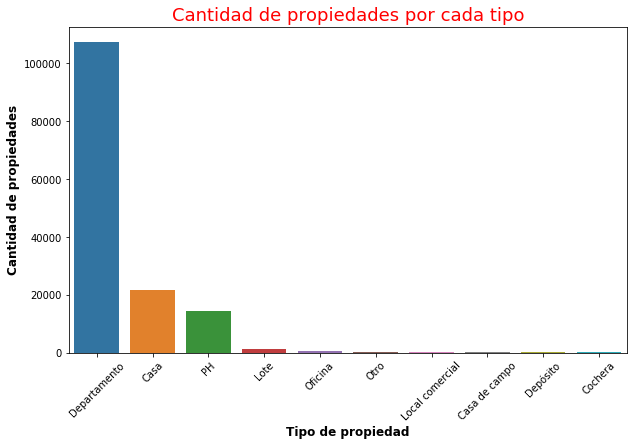

In [ ]:
print("Tipos de propiedad y cantidad de instancias por cada una:\n", propiedades["property_type"].value_counts(), sep = "")

plt.figure(figsize = (10,6))
sns.countplot(x = "property_type", data = propiedades, order = propiedades['property_type'].value_counts().index)
plt.xticks(rotation = 45)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada tipo", fontsize=18, color="red")

**Tipos de propiedad->** Según los datos obtenidos y el gráfico, podemos ver que contamos con diversos tipos de propiedades en nuestro dataset, pero la gran mayoría pertenecen solo a tres de estos tipos (Deprtamento, Casa y PH)

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Zonas de Bs. As. y cantidad de instancias por cada una:
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades por cada barrio')

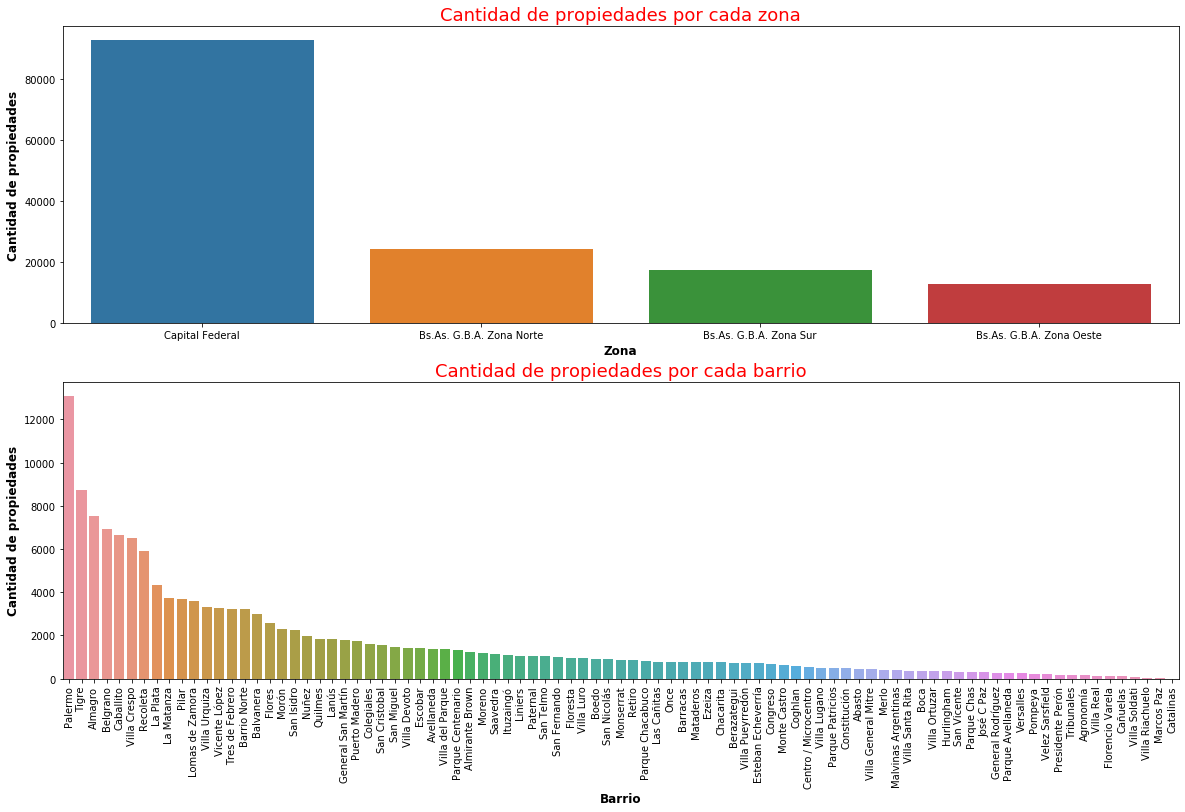

In [ ]:
print("Zonas de Bs. As. y cantidad de instancias por cada una:\n", propiedades["l2"].value_counts(), sep = "")

plt.figure(figsize = (20,12))

plt.subplot(2,1,1)
sns.countplot(x = "l2", data = propiedades, order = propiedades['l2'].value_counts().index)
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada zona", fontsize=18, color="red")

plt.subplot(2,1,2)
sns.countplot(x = "l3", data = propiedades, order = propiedades['l3'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("Barrio", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada barrio", fontsize=18, color="red")

**Ubicación de las propiedades->** Como se puede observar en los números y el primer gráfico, más del 50% de las propiedades de nuestro dataset se encuentran en Capital Federal

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

En base a lo observado anteriormente, se seleccionaron los tipos de propiedades "Departamento", "Casa" y "PH", de las cuales a su vez seleccionamos solo las ubicadas en "Capital Federal"

In [ ]:
#Seleccionamos los tres tipos de propiedad más abundantes
mask_type = propiedades.property_type.isin(["Departamento", "Casa", "PH"])
prop_type = propiedades[mask_type]

#Nos quedamos sólo con las ubicadas en Capital Federal
mask_loc = prop_type.l2 == "Capital Federal"
seleccion = prop_type[mask_loc]

print(seleccion["property_type"].value_counts())

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64


In [ ]:
print("Tamaño del Data Frame filtrado:", seleccion.shape)

Tamaño del Data Frame filtrado: (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
seleccion[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Las variables "superficie total", "superficie cubierta" y "precio" tienen una gran dispersión. Los valores mínimos de "superficie total" y "superficie cubierta", 10 y 1 respectivamente, son dudosos. Todas las variables analizadas tienen valores máximos muy extremos.

In [ ]:
print("Cantidad de valores faltantes por columna:\n", seleccion.isna().sum(), sep = "")

Cantidad de valores faltantes por columna:
start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64


In [ ]:
#Eliminamos los instancias con valores faltantes para las variables de nuestros interés en este momento 
seleccion = seleccion.dropna(subset = ["bathrooms", "surface_total", "surface_covered"])

In [ ]:
#Eliminamos las propiedades que contengan valores de "superficie cubierta" mayores a la "superficie total" ya que no serían datos correctos
seleccion = seleccion[(seleccion.surface_total >= seleccion.surface_covered)]

Text(0.5, 0, 'Precio (USD)')

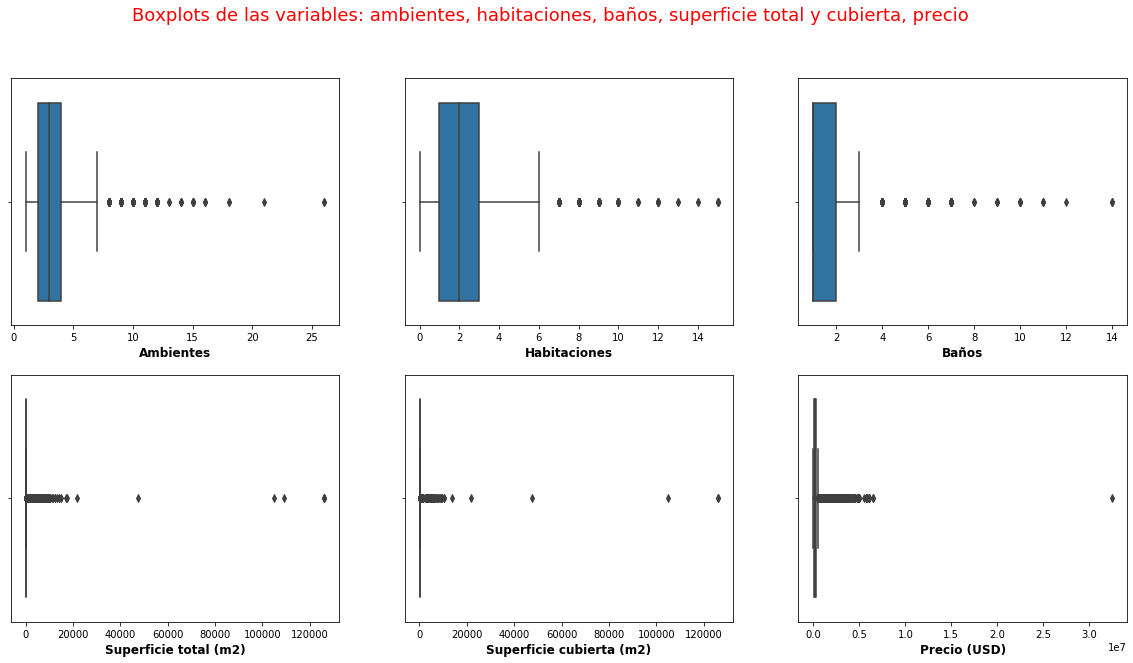

In [ ]:
#Graficamos diagramas de caja para cada variable de interés y así poder tener una mejor idea de su distribución
plt.figure(figsize = (20,10))
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")

plt.subplot(2,3,1)
sns.boxplot(seleccion.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(seleccion.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(seleccion.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(seleccion.surface_total)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(seleccion.surface_covered)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(seleccion.price)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)

En estos gráficos se puede apreciar mejor lo que ya se comentó anteriormente sobre la gran dispersión que poseen los valores de superficies y precio, así como los valores extremos presentes en las otras variables.

Para poner visualizar mejor las variables se filtraron los datos para eliminar dichos valores extremos. Para el filtrado se utilizó el rango intercuartílico, pero en lugar de utilizar el primer y tercer cuartil, se utiló el primer y noveno decil

In [ ]:
mínimo = seleccion.quantile (0.1) 
máximo = seleccion.quantile (0.9)
IQR = máximo - mínimo 

clean_select = seleccion[~ ((seleccion < (mínimo - 1.5 * IQR)) | (seleccion > (máximo + 1.5 * IQR))).any(axis=1)]

In [ ]:
print("Tamaño del conjunto de datos filtrado:", clean_select.shape)

Tamaño del conjunto de datos filtrado: (77044, 19)


Text(0.5, 0, 'Precio (USD)')

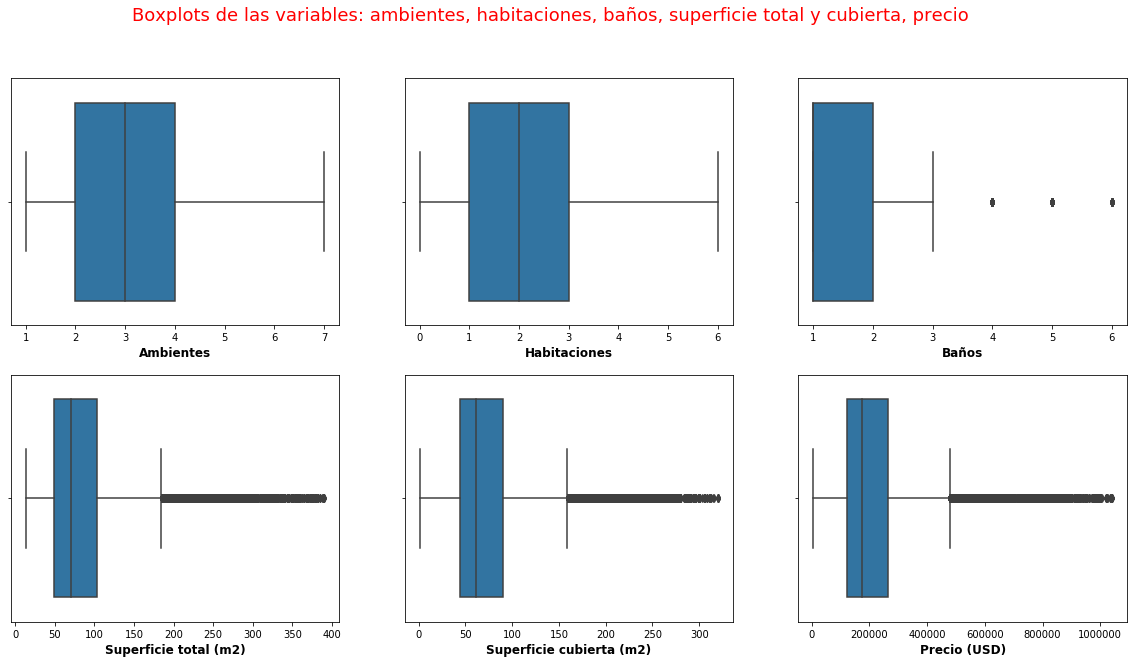

In [ ]:
#Volvemos a realizar diagramas de caja para ver el cambio luego del filtrado
plt.figure(figsize = (20,10))
plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")

plt.subplot(2,3,1)
sns.boxplot(clean_select.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.boxplot(clean_select.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.boxplot(clean_select.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.boxplot(clean_select.surface_total)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.boxplot(clean_select.surface_covered)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.boxplot(clean_select.price)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)

Como se puede apreciar, ahora se puede visualizar mucho mejor la distribución de los datos para cada variable.

Text(0, 0.5, 'Proporción de propiedades')

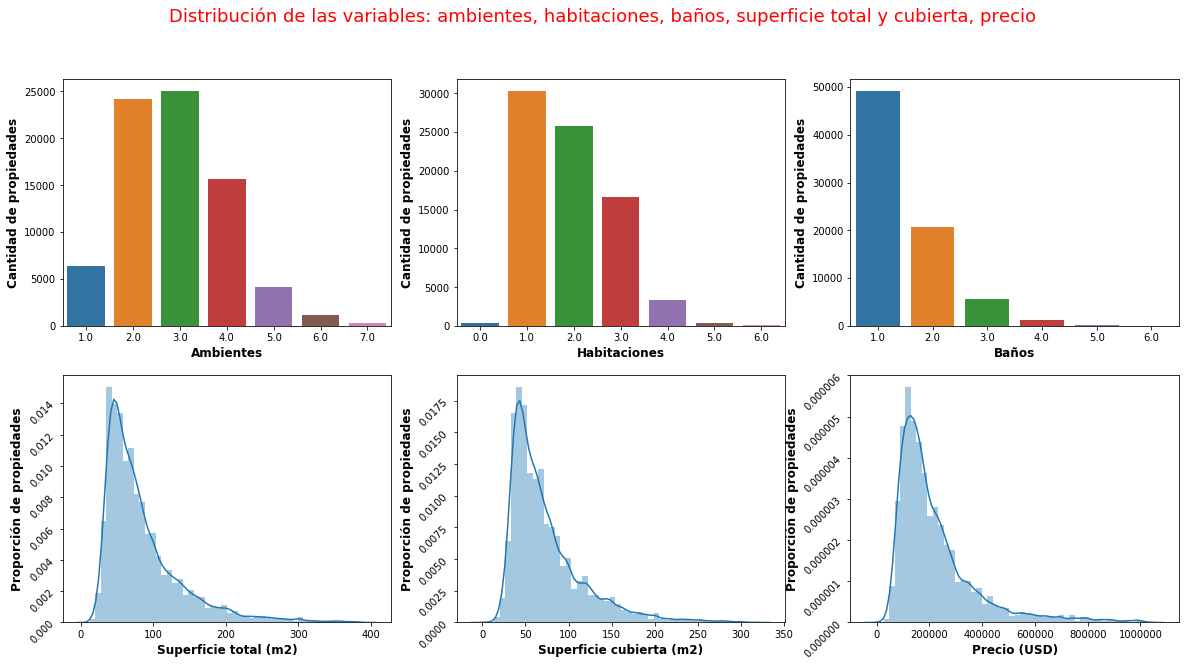

In [ ]:
#Realizamos unos gráficos de barra para las variables discretas e histogramas para las continuas, para tener una mejor visualización de las distribuciones
plt.figure(figsize = (20,10))
plt.suptitle("Distribución de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "r")

plt.subplot(2,3,1)
sns.countplot(clean_select.rooms)
plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(clean_select.bedrooms)
plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,3)
sns.countplot(clean_select.bathrooms)
plt.xlabel("Baños", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,4)
sns.distplot(clean_select.surface_total)
plt.yticks(rotation = 45)
plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,5)
sns.distplot(clean_select.surface_covered)
plt.yticks(rotation = 45)
plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

plt.subplot(2,3,6)
sns.distplot(clean_select.price)
plt.yticks(rotation = 45)
plt.xlabel("Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Proporción de propiedades", fontweight = "black", fontsize = 12)

Como se puede apreciar en los gráficos, las variables poseen una distribución sesgada a la izquierda. Lo que indica que la gran mayoría de los datos possen valores menores, pero luego hay una gran variedad de valores mayores con muy poca frecuencia.

Luego se realizó un pairplot para poder ver los diagramas de dispersión entre las variables numéricas y comenzar a tener una idea de las relaciones entre ellas

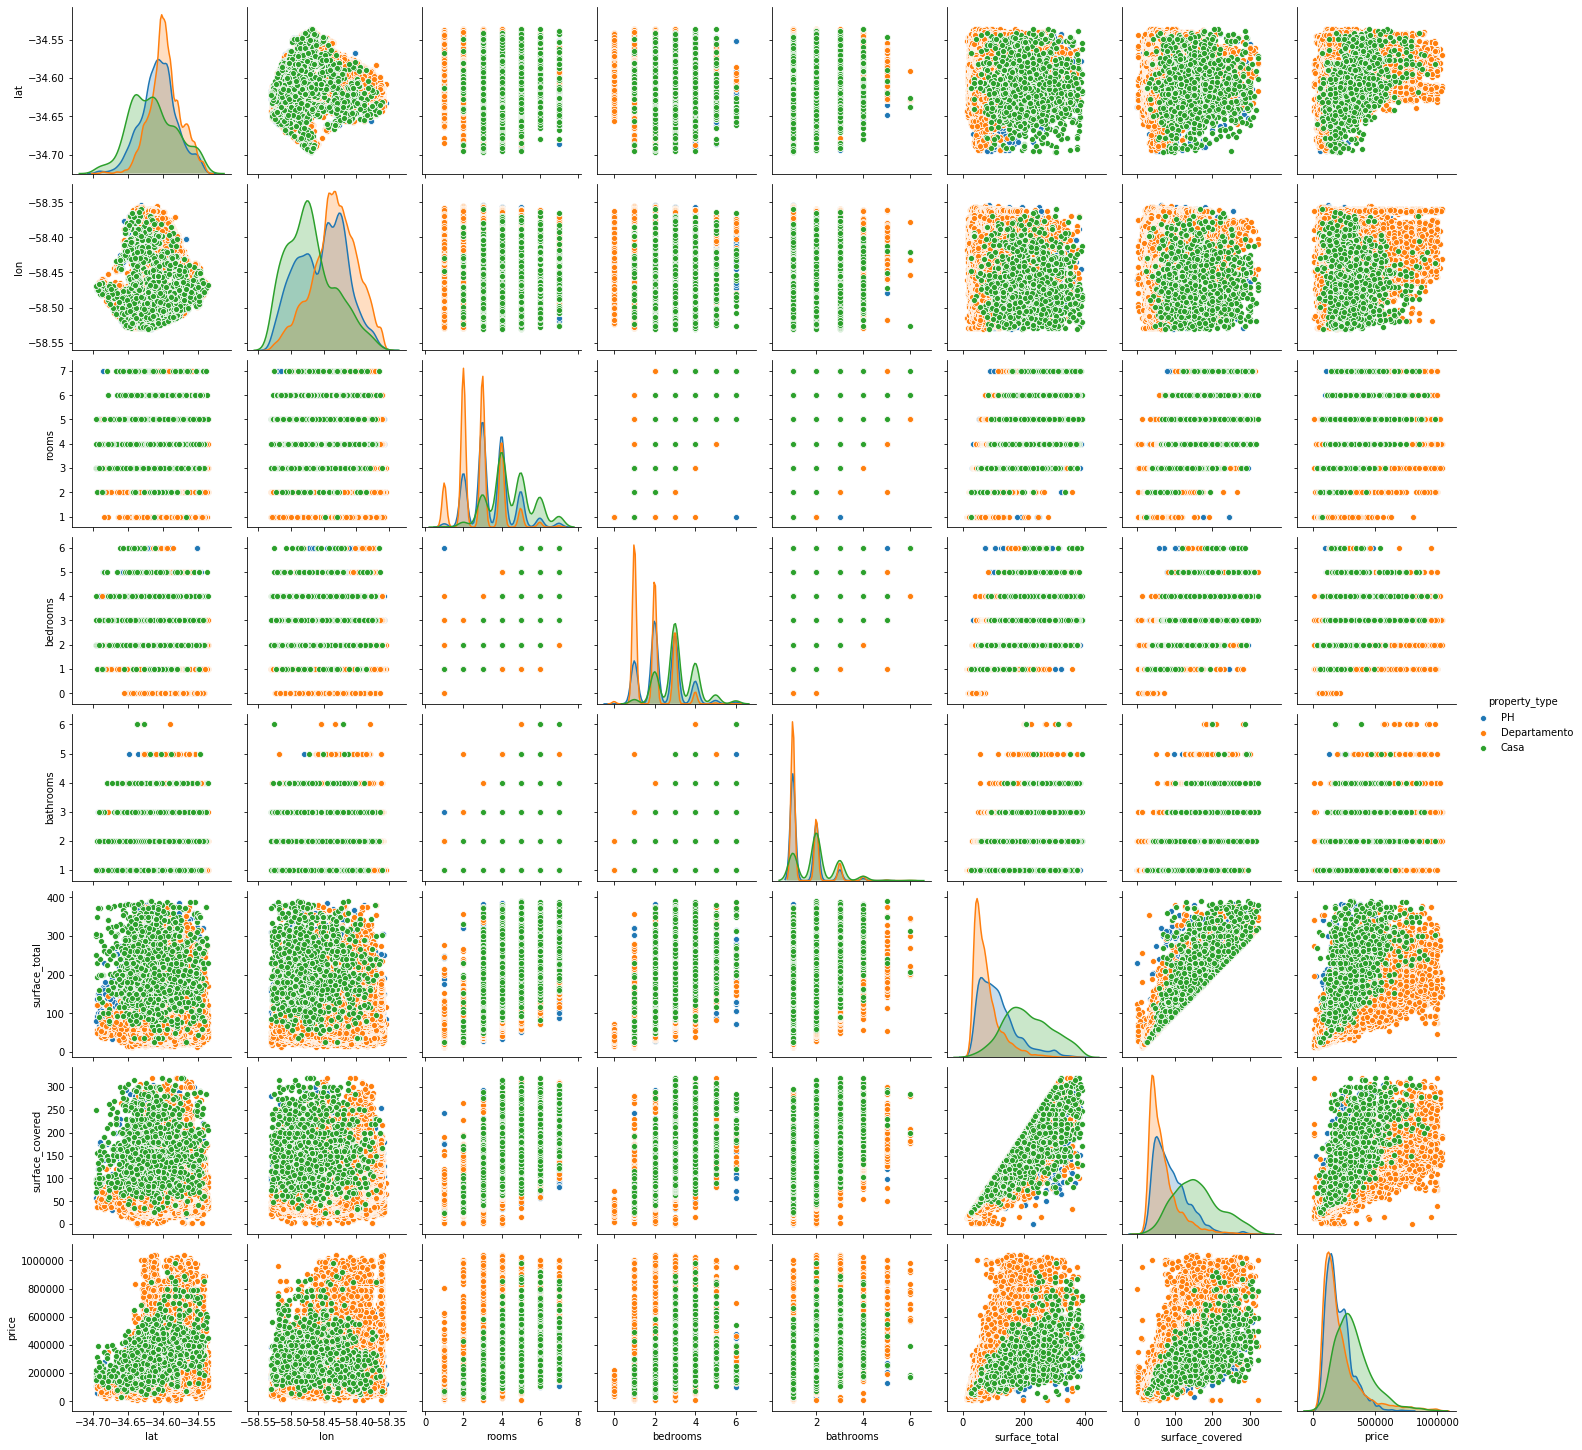

In [ ]:
sns.pairplot(clean_select, hue = "property_type")

Para poder observar en más detalle las relaciones que nos interesan para este proyecto, se realizaron los diagramas de dispersión para la variable precio con las variables ambientes, habitaciones, baños y ambas superficies, diferenciando el tipo de propiedad.

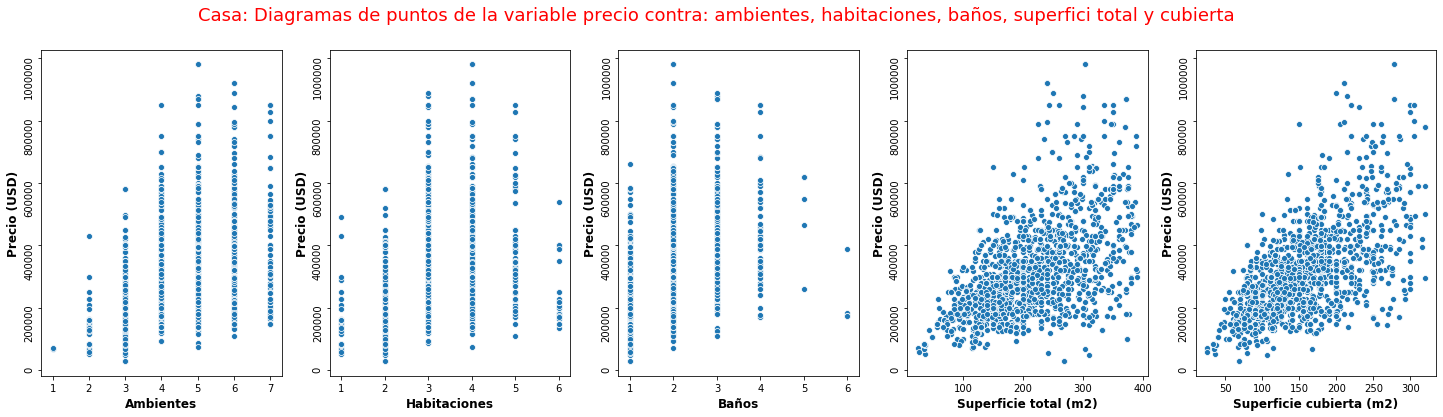

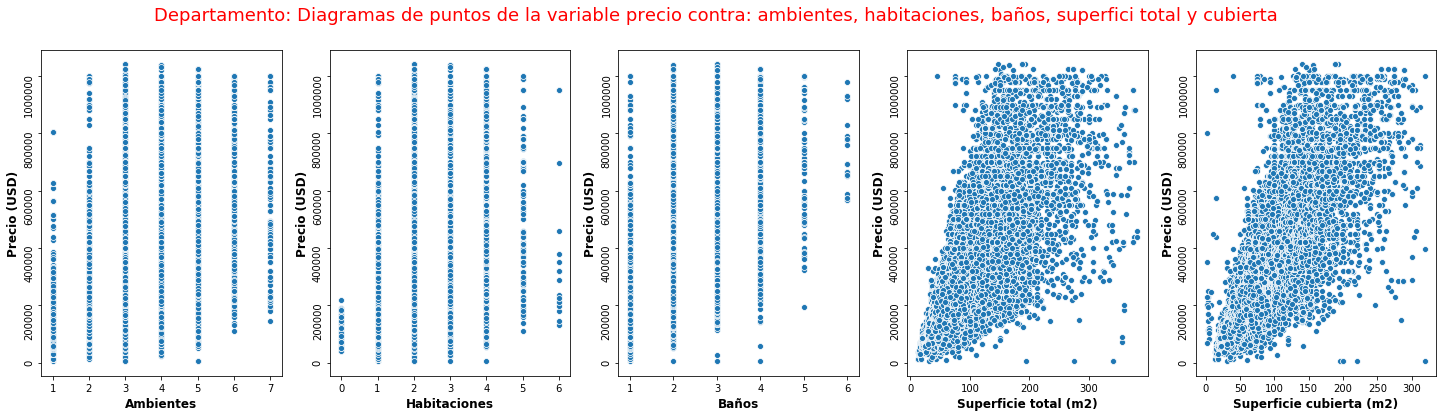

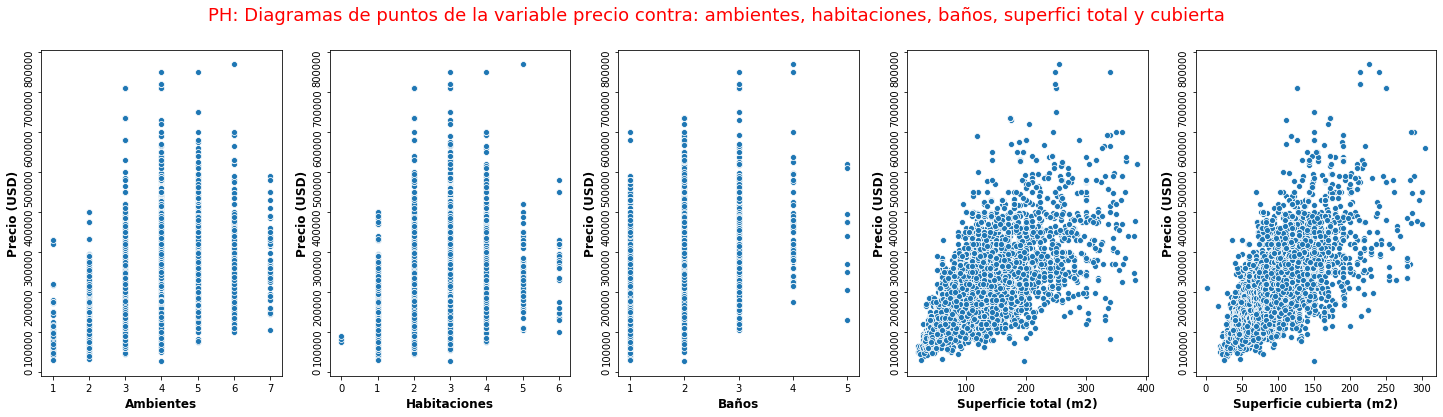

In [ ]:
tipos = ["Casa", "Departamento", "PH"]
for i in tipos:
    plt.figure(figsize = (25,6))
    plt.suptitle(f"{i}: Diagramas de puntos de la variable precio contra: ambientes, habitaciones, baños, superfici total y cubierta", fontsize=18, color = "r")

    plt.subplot(1,5,1)
    sns.scatterplot(clean_select[(clean_select.property_type == i)].rooms, clean_select[(clean_select.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Ambientes", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

    plt.subplot(1,5,2)
    sns.scatterplot(clean_select[(clean_select.property_type == i)].bedrooms, clean_select[(clean_select.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Habitaciones", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

    plt.subplot(1,5,3)
    sns.scatterplot(clean_select[(clean_select.property_type == i)].bathrooms, clean_select[(clean_select.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Baños", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

    plt.subplot(1,5,4)
    sns.scatterplot(clean_select[(clean_select.property_type == i)].surface_total, clean_select[(clean_select.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Superficie total (m2)", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)
    
    plt.subplot(1,5,5)
    sns.scatterplot(clean_select[(clean_select.property_type == i)].surface_covered, clean_select[(clean_select.property_type == i)].price)
    plt.yticks(rotation = 90)
    plt.xlabel("Superficie cubierta (m2)", fontweight = "black", fontsize = 12)
    plt.ylabel("Precio (USD)", fontweight = "black", fontsize = 12)

En los gráficos realizados se puede apreciar una tendencia a una relación positiva con las variables de superficies. En cuanto a las variables "Ambientes", "Habitaciones" y "Baños", en general no se puede determinar una clara relación, aunque en algunos casos, como el gráfico de los ambientes para las Casas, se puede interpretar que también hay una relación positiva.

Para obtener información más precisa se realizó a continuación el cálculo de los coeficientes de correlación.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Text(0.5, 1, 'Coeficientes de correlación (Pearson)')

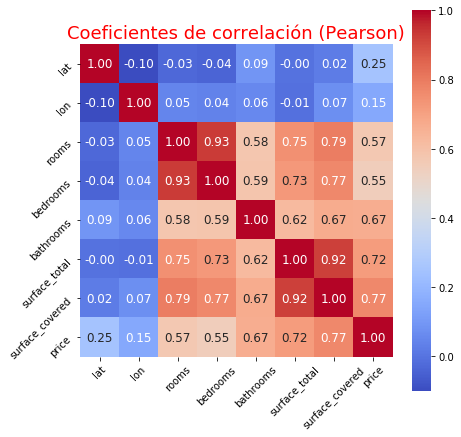

In [ ]:
corr = clean_select.corr()

plt.figure(figsize = (7,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "r")

A partir de los valores obtenidos se pueden apreciar varias cosas:
* En orden decreciente, las variables que poseen un coeficiente de correlación con la variable "Precio" superior a 0.5 son, "Superfie cubierta", "Superficie total, "Baños", "Ambientes" y "Habitaciones".
* Las variables "Superficie Total" y "Superficie cubierta", como es de esperarse, están altamente relacionadas.
* Al igual que las superficies, las variables "Ambientes" y "Habitaciones" también están muy relacionadas entre sí.
* En general se puede apreciar una gran relación entre todas las variables, excepto "lat", y "lon"

A continuación se realizó el mismo análisis pero para cada tipo de propiedad por separado.

Text(0.5, 1, 'PH')

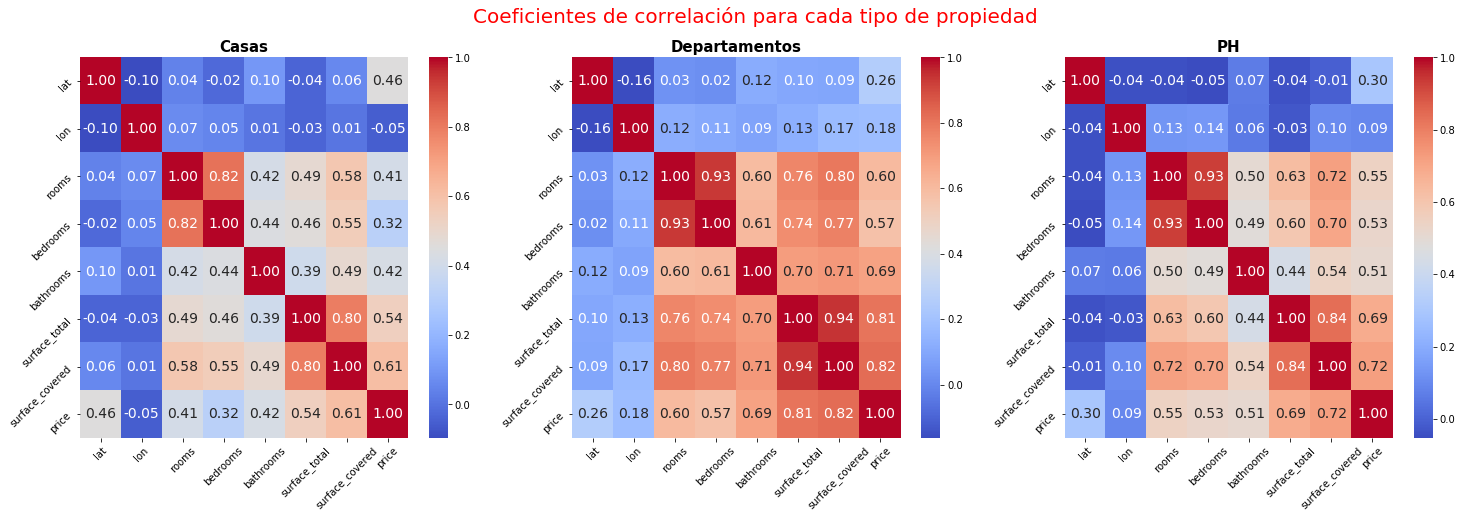

In [ ]:
corr_casa = clean_select[clean_select.property_type == "Casa"].corr()
corr_depto = clean_select[clean_select.property_type == "Departamento"].corr()
corr_ph = clean_select[clean_select.property_type == "PH"].corr()

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "r")

plt.subplot(1,3,1)
sns.heatmap(corr_casa, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Casas", fontweight = "black", fontsize = 15)

plt.subplot(1,3,2)
sns.heatmap(corr_depto, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Departamentos", fontweight = "black", fontsize = 15)

plt.subplot(1,3,3)
sns.heatmap(corr_ph, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("PH", fontweight = "black", fontsize = 15)

Al dividir el análisis por el tipo de propiedad podemos ver que para el caso de los Departamentos se mantienen las mismas relaciones vistas anteriormente. Para el caso de los PH también se mantienen en general las mismas conclusiones que antes pero con valores algo menores. Sin embargo, para las Casas se puede apreciar una considerable disminución en los valores de correlación, principalmente para las variables "Ambientes", "Habitaciones" y "Baños", también se puede apreciar un aumento considerable en el coeficiente de correlación para las variables "Precio" y "lat".

In [ ]:
print("Cantidad de propiedades por tipo:\n", clean_select["property_type"].value_counts(), sep = "")

Cantidad de propiedades por tipo:
Departamento    66461
PH               9036
Casa             1547
Name: property_type, dtype: int64


Hay que tener en cuenta que no contamos con el mismo número de propiedades para cada tipo.

### 2.1 Desafío

Para este punto se realizó un filtrado nuevo sobre el dataset original. Se siguió trabajando solo con los tres tipos de propiedades más abundantes, se eliminaron las instancias cuya "Superficie cubierta" era mayor a la "Superficie total", y finalmente se eliminaron las instancias con datos faltantes.

In [ ]:
desafio = propiedades[(propiedades.property_type == "Departamento") | (propiedades.property_type == "Casa") | (propiedades.property_type == "PH")]
desafio = desafio[(desafio.surface_total >= desafio.surface_covered)]
desafio = desafio.dropna()

print(desafio.shape)

(112373, 19)


* ¿Cuál es el precio promedio del metro cuadrado en cada barrio?

Tener en cuenta que sólo contamos con los datos de un portal inmobiliario. No contamos con datos de otras fuentes no digitales ni de propiedades que no hayan estado a la venta.

In [ ]:
desafio["Precio_m2"] = desafio["price"] / desafio["surface_covered"]

Text(0.5, 1.0, 'Precio medio del metro cuadrado cubierto en cada barrio')

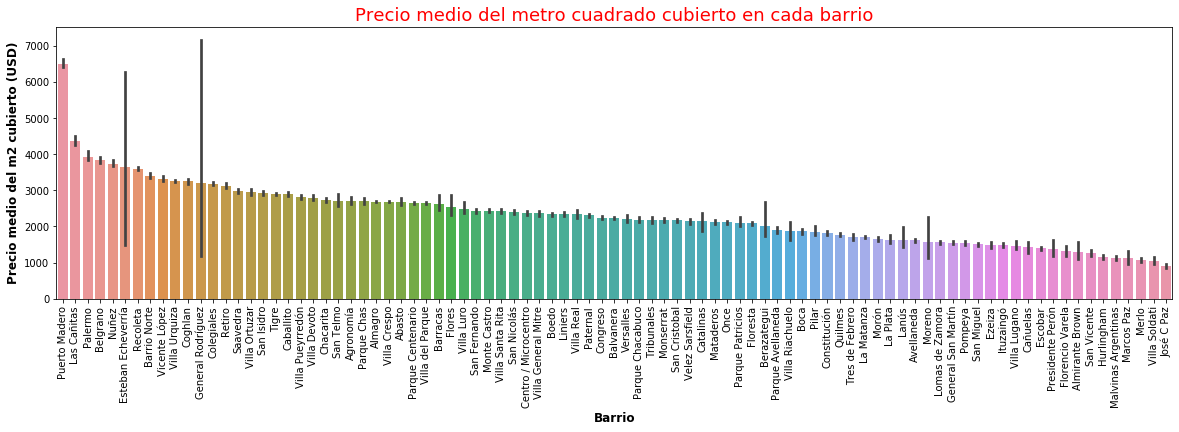

In [ ]:
orden = desafio.groupby(["l3"])['Precio_m2'].aggregate(np.mean).reset_index().sort_values('Precio_m2', ascending=False)

plt.figure(figsize = (20,5))

sns.barplot(desafio.l3, desafio.Precio_m2, order = orden["l3"])
plt.xticks(rotation = 90)
plt.xlabel("Barrio", fontweight = "black", fontsize = 12)
plt.ylabel("Precio medio del m2 cubierto (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio del metro cuadrado cubierto en cada barrio", fontsize=18, color="red")

* ¿Cuál es el precio medio del metro cuadrado según el tipo de propiedad?

Tener en cuenta las mismas consideraciones de antes, sumado a que contamos con unas gran variabilidad según la ubicación.

Text(0.5, 1.0, 'Precio medio del metro cuadrado cubierto según el tipo de propiedad')

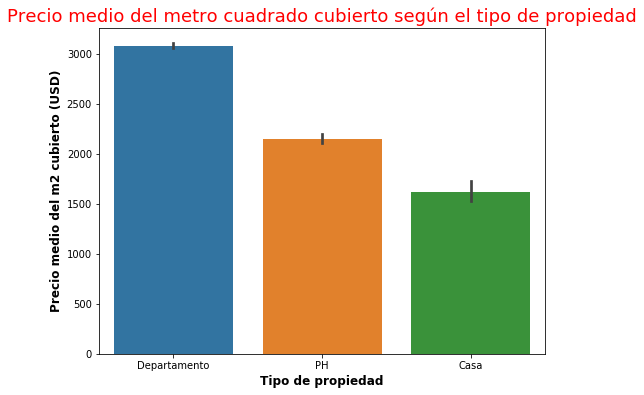

In [ ]:
plt.figure(figsize = (8,6))

sns.barplot(desafio.property_type, desafio.Precio_m2)
plt.xlabel("Tipo de propiedad", fontweight = "black", fontsize = 12)
plt.ylabel("Precio medio del m2 cubierto (USD)", fontweight = "black", fontsize = 12)
plt.title("Precio medio del metro cuadrado cubierto según el tipo de propiedad", fontsize=18, color="red")

* ¿Cuántas propiedades de cada tipo hay en cada zona de Buenos Aires?

Tener en cuanta que sólo estamos viendo las propiedades que estuvieron en venta. Para saber cuantas propiedades de cada tipo hay en cada zona habría que obtener los datos de todas las propiedades, esten o no a la venta.

Text(0.5, 1.0, 'Cantidad de propiedades, diferenciadas por el tipo, en cada zona de Buenos Aires')

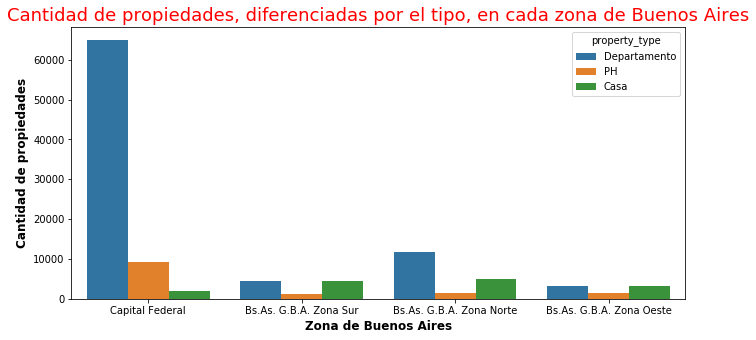

In [ ]:
plt.figure(figsize = (11,5))

sns.countplot(desafio["l2"], hue = desafio["property_type"])
plt.xlabel("Zona de Buenos Aires", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades, diferenciadas por el tipo, en cada zona de Buenos Aires", fontsize=18, color="red")

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [ ]:
seleccion_ML = propiedades[(propiedades.property_type == "Departamento") | (propiedades.property_type == "PH") | (propiedades.property_type == "Casa")]
seleccion_ML = seleccion_ML[seleccion_ML.l2 == "Capital Federal"]
print(seleccion_ML.shape)

(91485, 19)


In [ ]:
seleccion_ML = seleccion_ML[(15 <= seleccion_ML.surface_total) & (seleccion_ML.surface_total <= 1000)]

In [ ]:
seleccion_ML = seleccion_ML[seleccion_ML.price <= 4000000]

In [ ]:
seleccion_ML_1 = seleccion_ML[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [ ]:
seleccion_ML_1 = seleccion_ML_1.dropna()

In [ ]:
print(seleccion_ML_1.shape)

(81019, 6)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

**Benchmark**

Como modelo base se utilizó un árbol de decisión de profundidad 8, y con sólo dos variables independientes (Superficie total y cubierta), las cuales fueron las que presentaron los valores más altos de correlación con la variable dependiente Precio.

En primer lugar se pensó en una regresión lineal pero luego se descartó debido a la gran correlación existente entre las variables independientes y también porque, si bien, la relación entre el precio y las variables (sobre todo las superficies) tiene una tendencia a una relación lineal, existe mucha variabilidad y no se obtendrían buenos resultados. Finalmente se obtó por un árbol de decisión sencillo, utilizando solo las dos variables independientes que mostraron los valores más altos de correlación con la variable Precio, y debido a que ya se estaban utilizando pocas variables, se le asignó una profundidad intermedia.

In [ ]:
X_bm = seleccion_ML_1[["surface_total", "surface_covered"]]
y_bm = seleccion_ML_1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bm, y_bm, test_size = 0.3, random_state = 42)

In [ ]:
tree_bm = DecisionTreeRegressor(max_depth = 8)

In [ ]:
tree_bm.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_test_pred = tree_bm.predict(X_test)
y_train_pred = tree_bm.predict(X_train)

Para evaluar el desempeño de los modelos se utilizó el RMSE (Raíz del error cuadrado promedio), el cual es una de las métricas utilizadas para evaluar modelos de regresión. Las métricas utilizadas para evaluar los modelos de regresión, en su mayoría, miden el error en las predicciones.

RMSE, a diferencia de MAE (Error absoluto promedio), es más sensible a los errores extremos por lo cual, cuanto menor sea su valor vamos a tener menos errores extremos, lo cual indicaría que nuestro modelo está realizando mejor la predicción. A su vez, al evaluar el RMSE tanto en el conjunto utilizado para Train como para Test, podemos observar si hay overfiting.

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 165084.40201364335
Raíz del error cuadrático medio en Test: 175070.36760958686


Text(0, 0.5, 'Valores predichos del Precio (USD)')

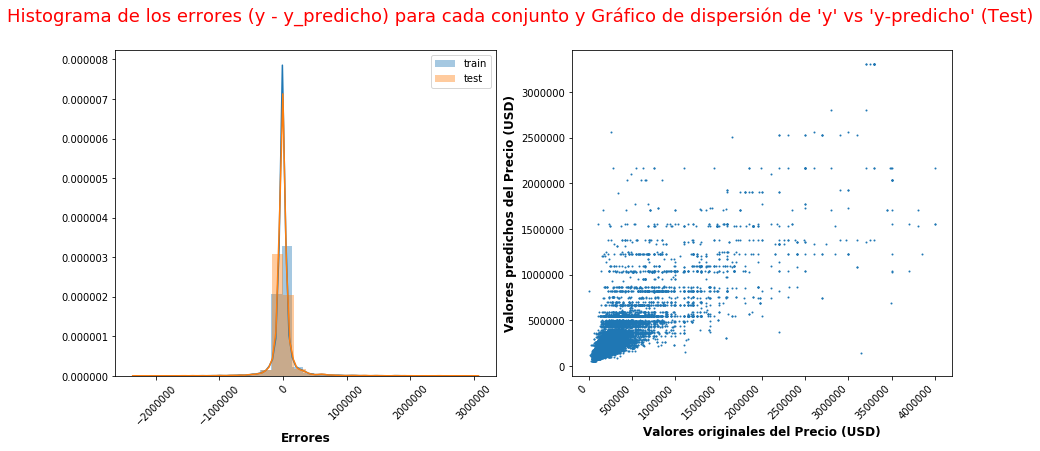

In [ ]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)

Se definió una función para aplicar cada vez que se cree un modelo y se requiera evaluar su desempeño

In [ ]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")

**Árbol de decisión**

Se evaluó el rendimiento del modelo árbol de decisión ahora utilizando 5 variables independientes (ambientes, habitaciones, baños, superficie total y cubierta). En primer lugar se utilizó la misma profundidad que el benchmark y luego se evaluó cual es la profundidad óptima y se calculó su rendimiento con dicha profundidad.

In [ ]:
X = seleccion_ML_1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y = seleccion_ML_1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
tree_model = DecisionTreeRegressor(max_depth = 8)

Raíz del error cuadrático medio en Train: 139064.9573938412
Raíz del error cuadrático medio en Test: 158772.15025933413


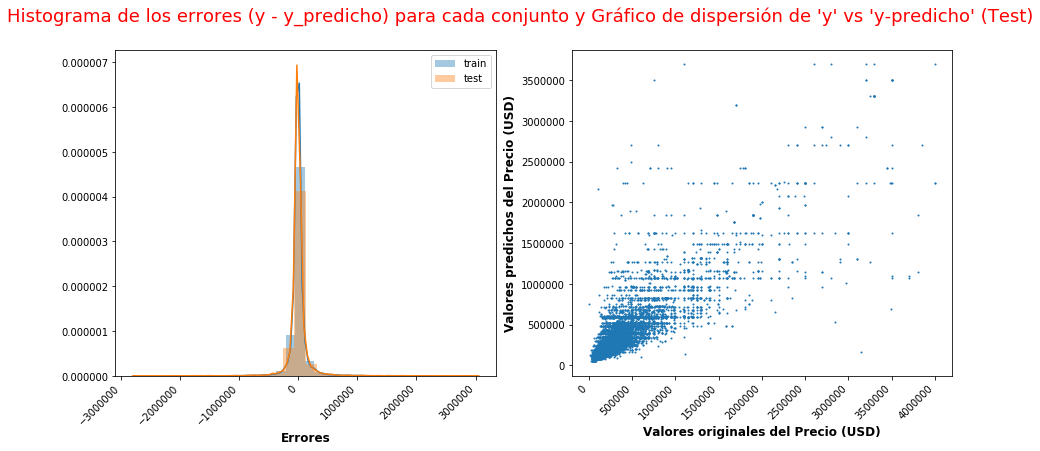

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

Se puede ver una mejora respecto al Benchmarck. El rmse pasó de ~175000 a ~158000, sin embargo sigue siendo un valor bastante alto. También se puede apreciar una leve mejora en el gráfico de dispersión.

Para tratar de mejorarlo aún más se calculó la profundidad más óptima para el modelo

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

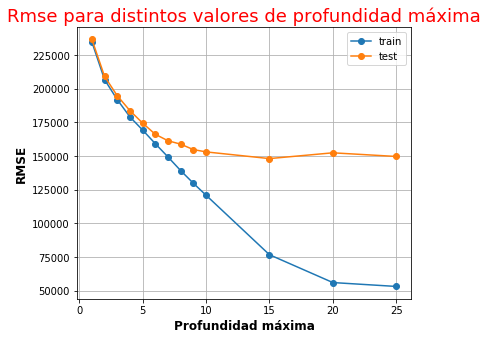

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Se eligió el valor 10. En comparación con el modelo de profundidad 15, no posee una diferencia significativa para el conjunto de Test, pero no sufre overfiting como si lo hace la profundidad 15.

In [ ]:
tree_model = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 153948.3521897782


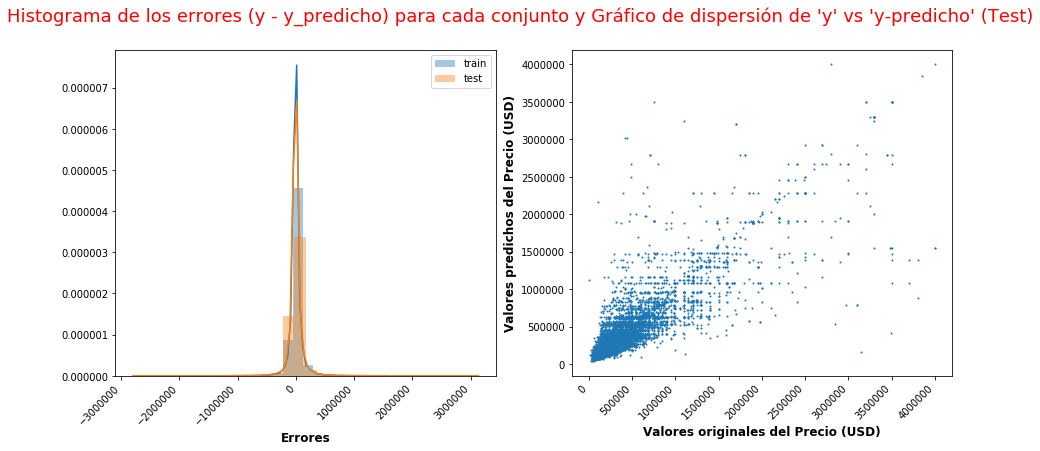

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

Este nuevo modelo mejora levemente el rmse (de ~158000 a ~152000), pero se puede observar una mayor concentración de puntos sobre la diagonal del gráfico de dispersión.

A continuación de calculó la importancia de cada variable en el modelo.

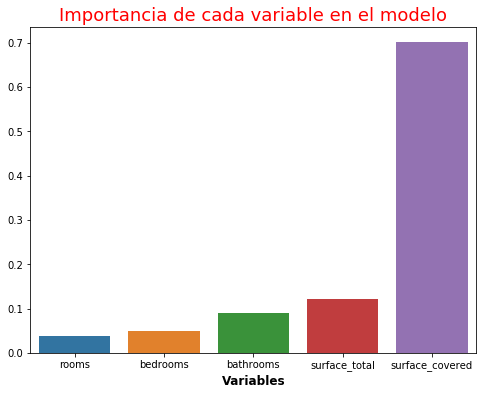

In [ ]:
importances = tree_model.feature_importances_
columns = X.columns

plt.figure(figsize = (8, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

**Vecino más cercano**

A continuación se realizó el mismo procedimiento realizado para el modelo de árbol de decisión pero para el modelo de vecinos más cercanos. En primer lugar se evaluó el rendimiento del modelo utilizando 5 vecinos, luego se obtuvo el número de vecinos más óptimo y se volvió a evaluar su rendimiento.

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors = 5)

Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


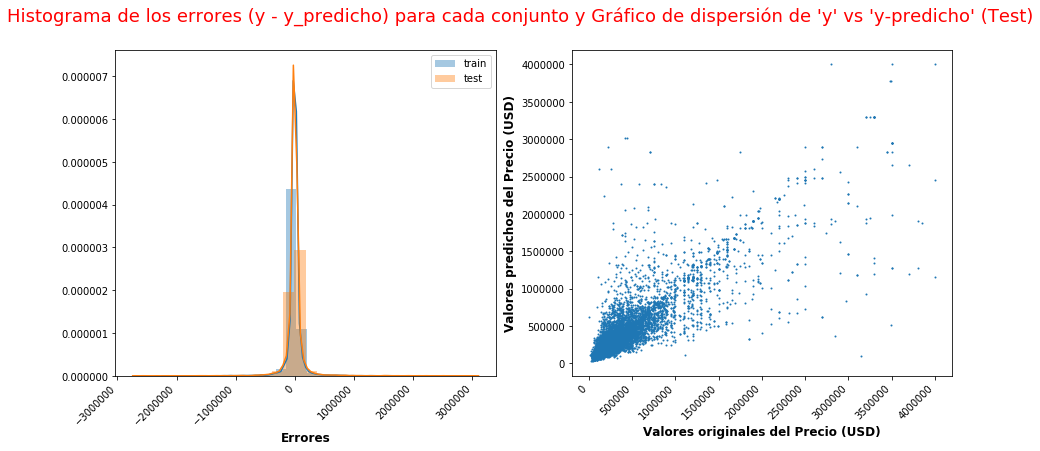

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model)

Con este modelo se obtuvo un rendimiento intermedio al de los dos árboles de decisión.

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

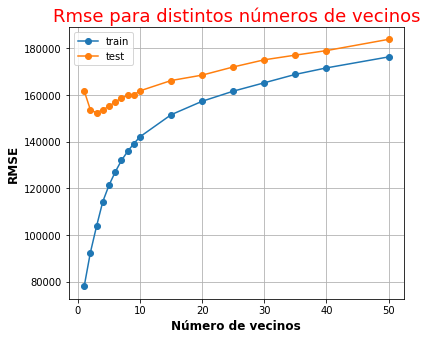

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
plt.figure(figsize = (6,5))          
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se eligió en número 3 ya que es el que presenta menor rmse en el conjunto Test.

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)

Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


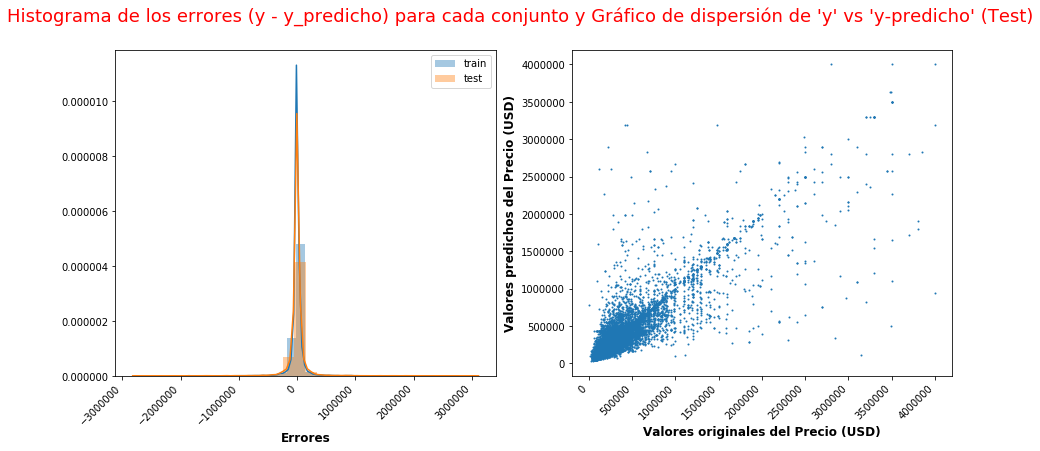

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model)

El rendimiento es similar del del árbol de decisión más óptimo, pero con un mayor overfiting.

Se volvió a calcular el número de vecinos más cercanos más optimo, pero ahora poniendo el párametro "weights" igual a "distancia"

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

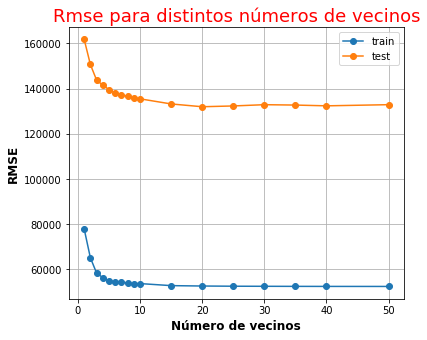

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k, weights = "distance")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

In [ ]:
KNN_model_2 = KNeighborsRegressor(n_neighbors = 20, weights = "distance")

Raíz del error cuadrático medio en Train: 52669.175313692605
Raíz del error cuadrático medio en Test: 131956.1761786944


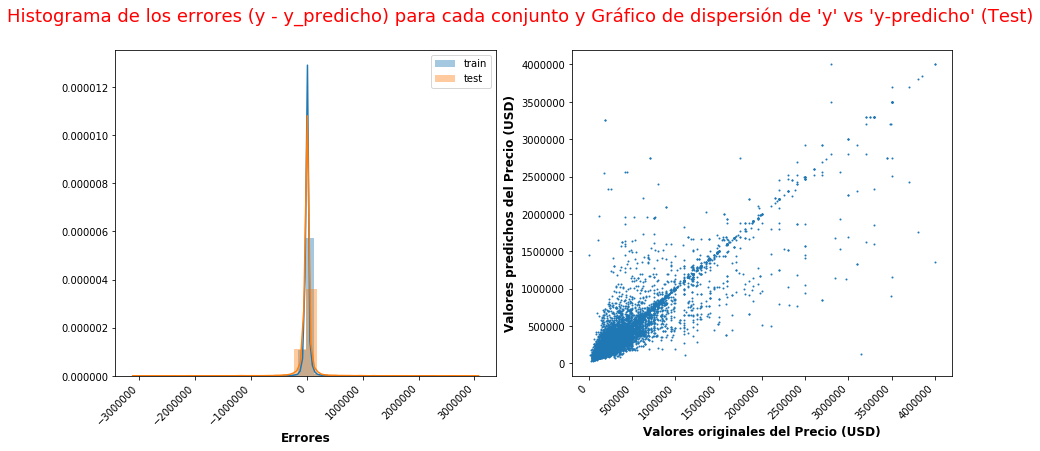

In [ ]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model_2)

Con este modelo se obtiene un rendimiento mucho mejor en cuanto al rmse, pero podemos observar que sufre mucho overfiting.

**Incorporación de latitud y longitud**

Ahora vamos a incorporar las variables independientes "latitud" y "longitud" para observar si ayudan a mejorar los modelos ya realizados

In [ ]:
seleccion_ML_2 = seleccion_ML[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [ ]:
seleccion_ML_2 = seleccion_ML_2.dropna()

In [ ]:
print(seleccion_ML_2.shape)

(76771, 8)


In [ ]:
X_2 = seleccion_ML_2[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y_2 = seleccion_ML_2["price"]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

- Árbol de decisión

Se volvió a calcular la profundidad máxima, por las dudas de que haya cambiado al agregarle las nuevas variables

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

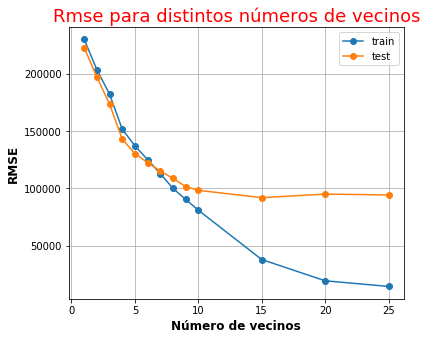

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X2_train, y2_train)
    y2_train_pred = model.predict(X2_train)
    train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    y2_test_pred = model.predict(X2_test)
    test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se mantiene la profundidad 10

In [ ]:
tree_model2 = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 80994.07241928209
Raíz del error cuadrático medio en Test: 98556.61708182518


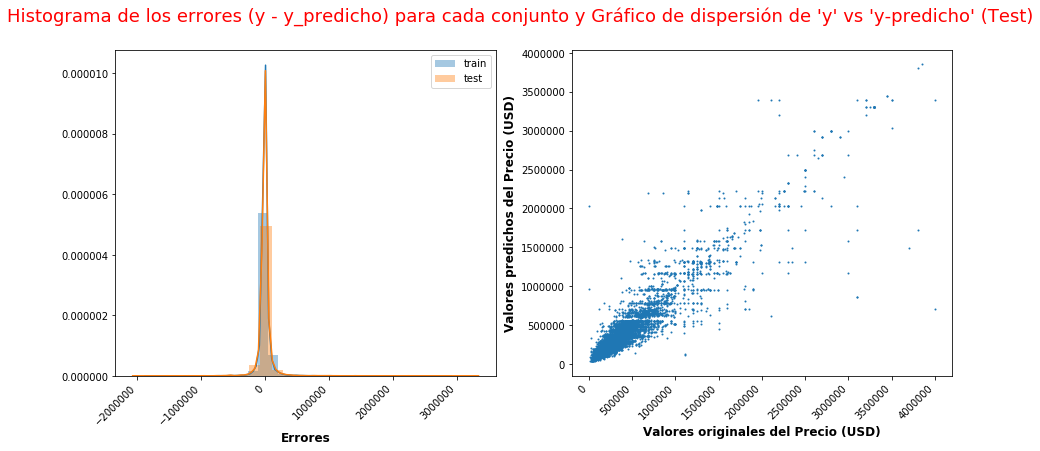

In [ ]:
Aplicar_modelo(X2_train, X2_test, y2_train, y2_test, tree_model2)

Con este nuevo modelo se pudo obtener un rendimiento mucho mejor. El rmse obtenido con el árbol de decisión anterior era de ~152000 mientras que el obtenido con este modelo es de ~98000 y se puede ver la gran concentración de puntos en la diagonal del gráfico de dispersión. A su vez no presenta overfiting.

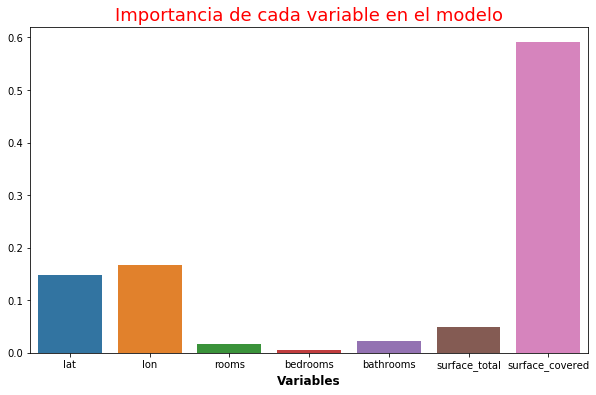

In [ ]:
importances = tree_model2.feature_importances_
columns = X_2.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

La superficie cubierta sigue siendo la variable más importante, pero la latitud y longitud presentan un importancia considerable.

En base a la importancia de cada variable, se probó un modelo más sencillo utilizando solo las variables que tienen mayor importancia para el modelo.

In [ ]:
X_3 = seleccion_ML_2[["lat", "lon", "surface_total", "surface_covered"]]
y_3 = seleccion_ML_2["price"]

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size = 0.3, random_state = 42)

In [ ]:
tree_model3 = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 80049.47995697077
Raíz del error cuadrático medio en Test: 97678.35373353046


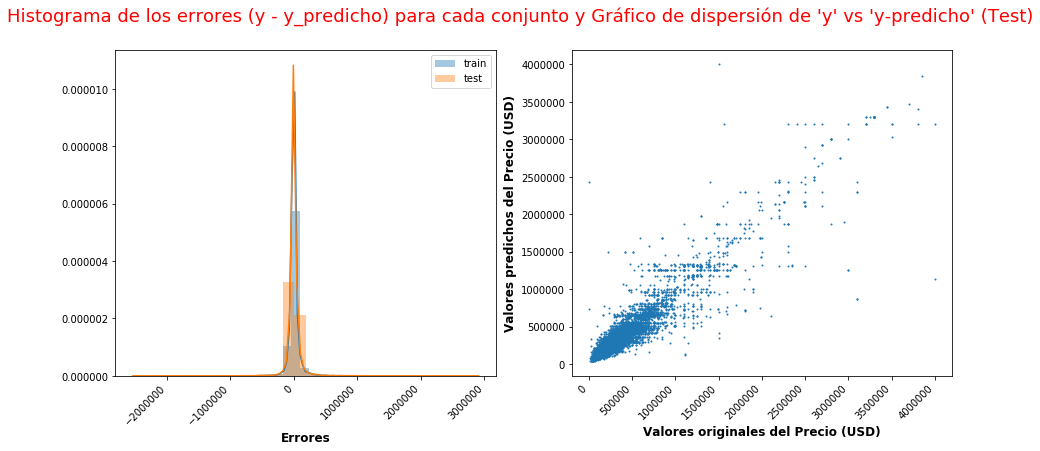

In [ ]:
Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, tree_model3)

Este nuevo modelo más sencillo, con solo 4 variables independientes presentó un rendimiento casi igual al anterior (de ~98000 subió solo a ~99000).

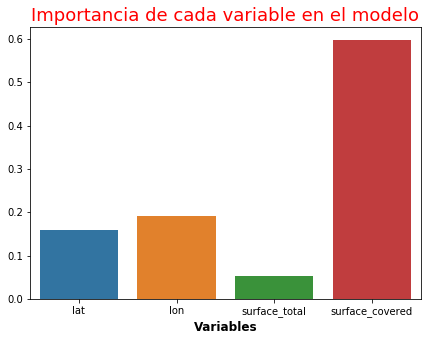

In [ ]:
importances = tree_model3.feature_importances_
columns = X_3.columns

plt.figure(figsize = (7, 5))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

- Vecino más cercano

Se volvió a calcular el número de vecinos, por las dudas de que haya cambiado al agregarle las nuevas variables. No se utilizó la distancia para el parámetro "weights" debido al gran overfiting que producia.

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

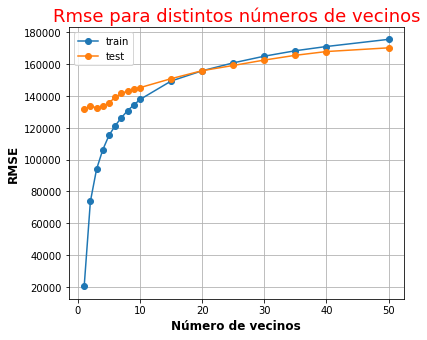

In [ ]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X2_train, y2_train)
    y2_train_pred = model.predict(X2_train)
    train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    y2_test_pred = model.predict(X2_test)
    test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se mantiene el número 3

In [ ]:
KNN_model2 = KNeighborsRegressor(n_neighbors = 3)

Raíz del error cuadrático medio en Train: 94074.99324103778
Raíz del error cuadrático medio en Test: 132671.26456873622


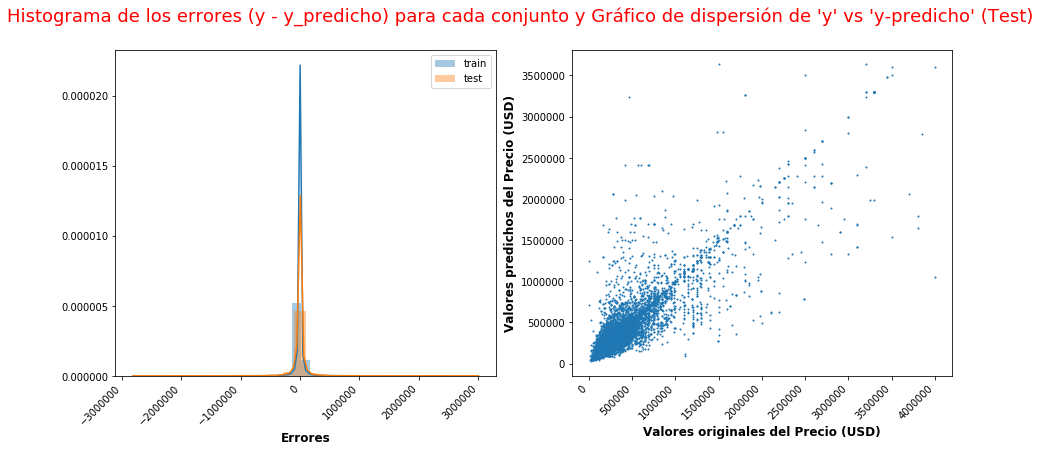

In [ ]:
Aplicar_modelo(X2_train, X2_test, y2_train, y2_test, KNN_model2)

Se obtuvo una disminución importante del rmse con respecto al modelo anterior de vecinos más cercanos, pasó de ~152000 a ~132000, pero sufre bastante overfiting.

**Conclusión**

Podríamos decir que el mejor modelo para la problemática planteada es el modelo de árbol de decisión, con una profundidad máxima igual a 10. En cuanto a las variables utilizadas, hemos visto que utilizando solo las variables "latitud", "longitud", "superficie total" y "superficie cubierta" se obtiene un rendimiento muy similir al modelo más complejo que utiliza todas las variables (7 en total). Esto probablemente se deba a la gran relación que presentan las variables entre si (excepto latitud y longitud). Se podría pensar que la superficie cubierta engloba dentro de ella el número de ambientes, habitaciones y baños, ya que a media que aumenta el número de estos últimos, por lógica se tiene mayor superficie cubierta.

También hay que tener en cuenta que con el modelo más óptimo obtenido, los valores de rmse siguen siendo bastante elevados, por lo cual hay que considerar evaluar diferentes variables independientes que no estén relacionadas con las utilizadas, pero que pueden estar bastante relacionadas con el precio de una propiedad, como ser la presencia de piscinas, balcones, terrazas, etc.

In [ ]:
resumen = {"Modelo":["Benchmark", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos", "Vecinos más cercanos"], 
           "Hiper-parámetros":["profundidad máxima = 8", "profundidad máxima = 10", "profundidad máxima = 10", "número de vecinos = 3", "número de vecinos = 3"], 
           "Variables X": [2, 7, 4, 5, 7], "RMSE (test)":["~175000", "~97000", "~98000", "~152000", "~132000"], "Overfiting":["No", "No", "No", "Sí", "Sí"]}
pd.DataFrame(resumen)

,Modelo,Hiper-parámetros,Variables X,RMSE (test),Overfiting
0,Benchmark,profundidad máxima = 8,2,~175000,No
1,Árbol de decisión,profundidad máxima = 10,7,~97000,No
2,Árbol de decisión,profundidad máxima = 10,4,~98000,No
3,Vecinos más cercanos,número de vecinos = 3,5,~152000,Sí
4,Vecinos más cercanos,número de vecinos = 3,7,~132000,Sí
